<a href="https://colab.research.google.com/github/firaaliah/202055202088-firaaliah/blob/master/tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firaaliah","key":"dc2e9e8d6ff8de05f14d7710ec97bfe7"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 65 Apr 14 06:51 kaggle.json


In [4]:
!pip install -q kaggle



In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6322        245  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2125         53  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2263         46  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [9]:
!kaggle datasets download -d umairshahpirzada/birds-20-species-image-classification

 98% 68.0M/69.3M [00:02<00:00, 30.6MB/s]
100% 69.3M/69.3M [00:02<00:00, 24.5MB/s]


In [10]:
!unzip birds-20-species-image-classification.zip

Archive:  birds-20-species-image-classification.zip
  inflating: images to predict/1.jpg  
  inflating: images to predict/2.jpg  
  inflating: images to predict/3.jpg  
  inflating: images to predict/4.jpg  
  inflating: images to predict/5.jpg  
  inflating: images to predict/6.jpg  
  inflating: test/ABBOTTS BABBLER/1.jpg  
  inflating: test/ABBOTTS BABBLER/2.jpg  
  inflating: test/ABBOTTS BABBLER/3.jpg  
  inflating: test/ABBOTTS BABBLER/4.jpg  
  inflating: test/ABBOTTS BABBLER/5.jpg  
  inflating: test/ABBOTTS BOOBY/1.jpg  
  inflating: test/ABBOTTS BOOBY/2.jpg  
  inflating: test/ABBOTTS BOOBY/3.jpg  
  inflating: test/ABBOTTS BOOBY/4.jpg  
  inflating: test/ABBOTTS BOOBY/5.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/1.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/2.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/3.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/4.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/5.jpg  
  inflating: test/AFRICAN CROWNED CRANE

In [17]:
from ast import PyCF_ONLY_AST
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model

In [46]:
train_ds="/content/train"
test_ds="/content/test"
validation_ds="/content/valid"

In [27]:
batch_size = 32
img_size = 224

In [47]:
train_datagen = ImageDataGenerator(rescale=1/225.,
                              zoom_range=0.2,
                            width_shift_range=0.2, height_shift_range=0.2
                            )
val_datagen = ImageDataGenerator (rescale=1/225.)
test_datagen = ImageDataGenerator (rescale=1/225.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  


validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


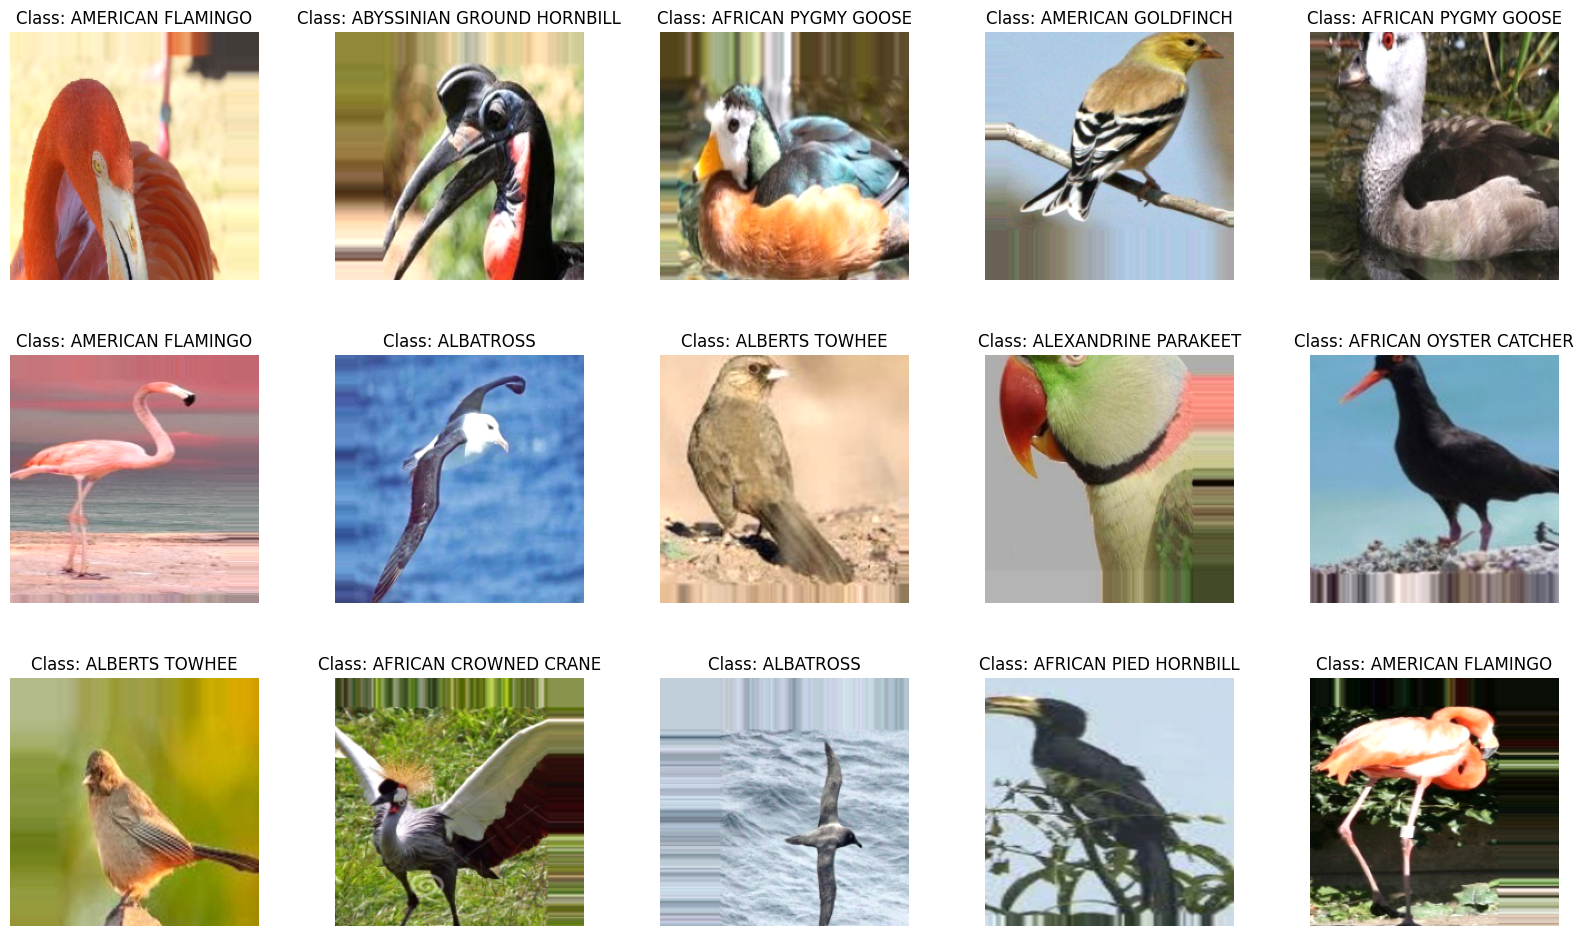

In [59]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
  plt.subplot(5 , 5, i+1)
  plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
  plt.imshow(images[i])
  plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
  plt.axis("off")         

In [60]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [61]:
img= train_generator[0]
print(img)

(array([[[[0.60444444, 0.5330401 , 0.46652007],
         [0.60444444, 0.5330401 , 0.46652007],
         [0.60444444, 0.5330401 , 0.46652007],
         ...,
         [0.519889  , 0.46626243, 0.41278246],
         [0.5010417 , 0.4459579 , 0.39320657],
         [0.5075767 , 0.44547933, 0.39623475]],

        [[0.60444444, 0.52444446, 0.46222222],
         [0.60444444, 0.52444446, 0.46222222],
         [0.60444444, 0.52444446, 0.46222222],
         ...,
         [0.58694   , 0.5232973 , 0.46409908],
         [0.5653381 , 0.5016954 , 0.4424971 ],
         [0.5543095 , 0.4906668 , 0.43146858]],

        [[0.60444444, 0.52444446, 0.46222222],
         [0.60444444, 0.52444446, 0.46222222],
         [0.60444444, 0.52444446, 0.46222222],
         ...,
         [0.62781745, 0.55670637, 0.49003968],
         [0.6321862 , 0.5610751 , 0.4944084 ],
         [0.63736016, 0.5662491 , 0.49958244]],

        ...,

        [[0.44444445, 0.39111114, 0.3288889 ],
         [0.44444445, 0.39111114, 0.3288889 

In [62]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [63]:
img = train_generator[0]
print(img[0].shape)
print(img[1].shape)

(32, 224, 224, 3)
(32, 20)


In [64]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
13
14


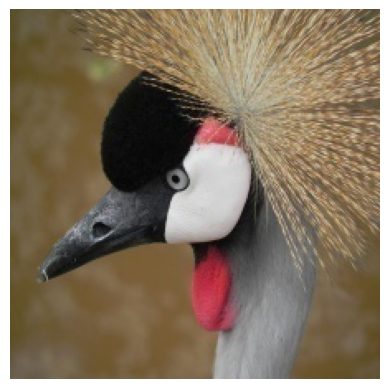

In [69]:
import matplotlib.pyplot as plt
from skimage import io


img_url = "/content/images to predict/1.jpg"
img = io.imread(img_url)


plt.imshow(img)
plt.axis('off')
plt.show()

In [72]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as k

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                   

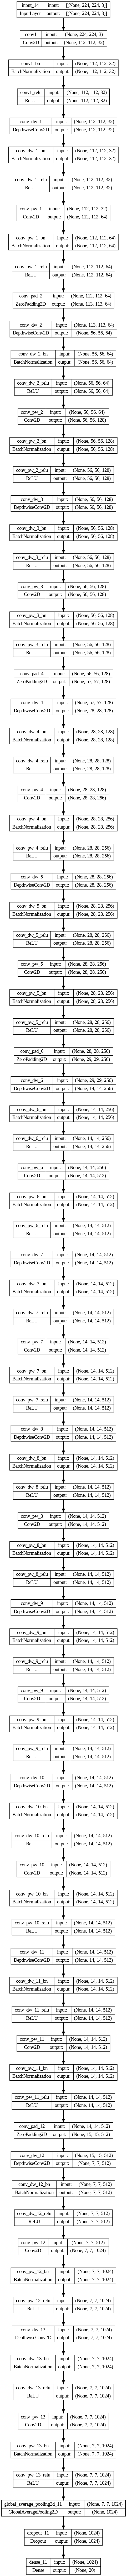

In [99]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(20, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model



input_shape = (224, 224, 3)
num_classes = 20

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [79]:
model = mobilenet((224, 224, 3))

In [100]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [101]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=30)

Epoch 1/30
101/101 [==============================] - 56s 428ms/step - loss: 3.0132 - accuracy: 0.1761 - val_loss: 7.0114 - val_accuracy: 0.1000
Epoch 2/30
101/101 [==============================] - 46s 454ms/step - loss: 2.0500 - accuracy: 0.3641 - val_loss: 13.3126 - val_accuracy: 0.1000
Epoch 3/30
101/101 [==============================] - 44s 431ms/step - loss: 1.8114 - accuracy: 0.4470 - val_loss: 11.4001 - val_accuracy: 0.1200
Epoch 4/30
101/101 [==============================] - 43s 425ms/step - loss: 1.5155 - accuracy: 0.5284 - val_loss: 9.1544 - val_accuracy: 0.2300
Epoch 5/30
101/101 [==============================] - 43s 426ms/step - loss: 1.3582 - accuracy: 0.5792 - val_loss: 9.7365 - val_accuracy: 0.1500
Epoch 6/30
101/101 [==============================] - 45s 443ms/step - loss: 1.3139 - accuracy: 0.5988 - val_loss: 3.7349 - val_accuracy: 0.4100
Epoch 7/30
101/101 [==============================] - 43s 421ms/step - loss: 1.1641 - accuracy: 0.6403 - val_loss: 5.0109 - val_

In [103]:
n_categories = len(os.listdir('/content/test'))

In [104]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,3.013186,0.176122,7.011429,0.10
1,2.050034,0.364090,13.312606,0.10
2,1.811355,0.447007,11.400058,0.12
3,1.515531,0.528367,9.154407,0.23
4,1.358204,0.579177,9.736542,0.15


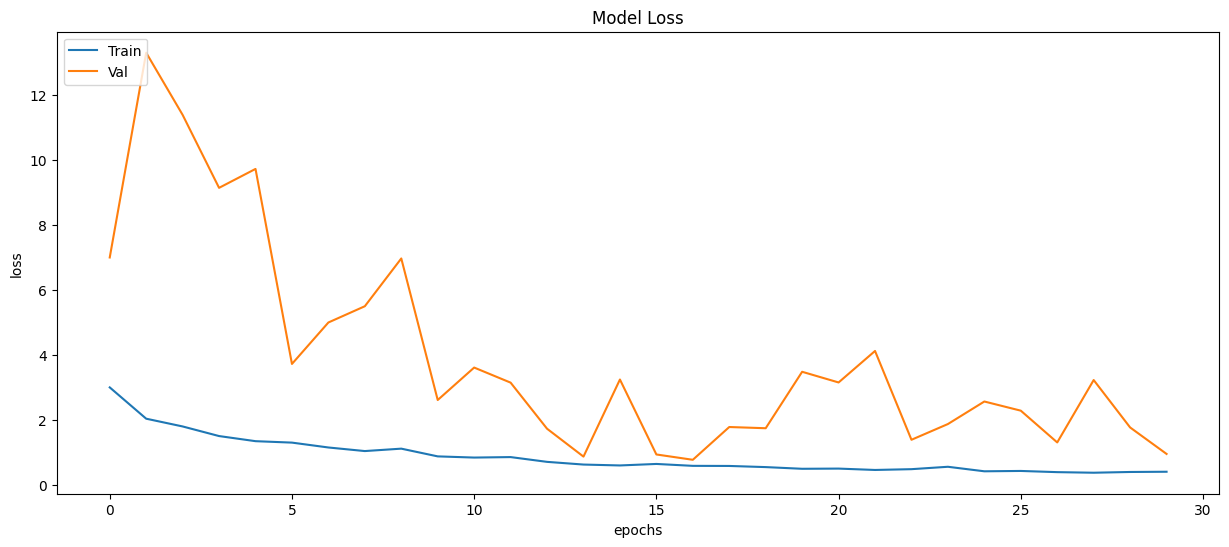

In [105]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

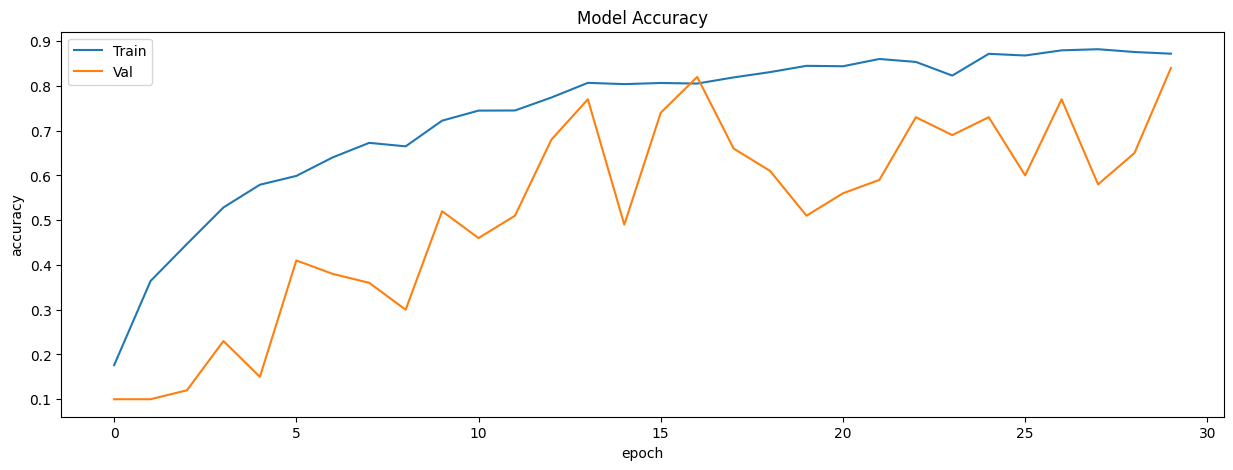

In [106]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [107]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 1s 67ms/step


In [108]:
results =model.evaluate(test_generator)

4/4 [==============================] - 0s 68ms/step - loss: 1.2699 - accuracy: 0.7400


In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.50      0.40      0.44         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.62      1.00      0.77         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.80      0.80      0.80         5
           8       0.31      1.00      0.48         5
           9       0.60      0.60      0.60         5
          10       0.80      0.80      0.80         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       1.00      0.20      0.33         5
          14       0.80      0.80      0.80         5
          15       1.00      0.20      0.33         5
          16       1.00      1.00      1.00         5
          17       1.00    

1/1 [==============================] - 0s 325ms/step


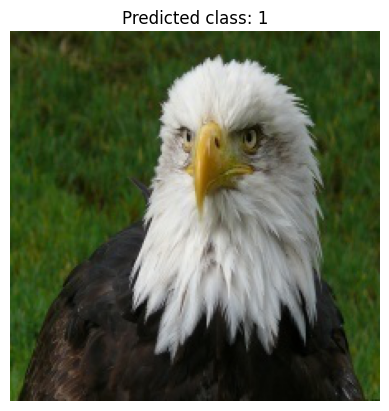

In [128]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/images to predict/'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open('/content/images to predict/6.jpg')
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0
predictions = model.predict(images)

img_index = 0

class_label = np.argmax(predictions[img_index])

plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [132]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : ABBOTTS BOOBY
Class probability: 0.99276006
Predicted class for 2.jpg : ABBOTTS BOOBY
Class probability: 0.99276006
Predicted class for 3.jpg : ABBOTTS BOOBY
Class probability: 0.99276006
Predicted class for 4.jpg : ABBOTTS BOOBY
Class probability: 0.99276006
Predicted class for 5.jpg : ABBOTTS BOOBY
Class probability: 0.99276006
Predicted class for 6.jpg : ABBOTTS BOOBY
Class probability: 0.99276006
Predicted class for 7.jpg : ABBOTTS BOOBY
Class probability: 0.99276006
